In [1]:
import sys
import os
sys.path.append("/mnt/brain5/scratch/wcarvalh/projects/rljax/")
print("Started")
print(os.getcwd())

Started
/mnt/brain5/scratch/wcarvalh/projects/rljax/analysis/archive


In [2]:
from IPython.display import display, HTML

from vistools.tensorboard_data import TensorboardData
from vistools.tensorboard_vistools import Vistool, PanelTool


%matplotlib inline
%load_ext autoreload
%autoreload 2

/home/wcarvalh/miniconda3/envs/acmejax/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
basepath="/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/"

run_data = TensorboardData(
    search_paths=None,
    search_kwargs=dict(
        basepath=basepath,
        njobs=16,
        verbose=1,
    )
)

In [4]:
run_data.load_paths(
    search_paths=[
        # e.g. goto_avoid/settings/seed
        # "respawn_baselines/*/*",
        "model_hpsearch3/*/*",
        # "unsup_respawn_v2/*/*",
    ],
    config_file='config.json',

)
run_data.load_settings(config_search='config.json')

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/model_hpsearch3/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/model_hpsearch3/*/*: 11


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 51206.82it/s]


Added: 4
{'max_replay_size': {200000, 150000},
 'normalize_step': {False, True},
 'q_aux_anneal': {100000, 200000}}


,q_aux_anneal,max_replay_size,normalize_step
0,100000,200000,None
1,100000,150000,False
2,100000,150000,True
3,200000,200000,None


In [5]:
run_data.load_tensorboard(
    njobs=8,
    key_filter=lambda k: 'steps' in k.lower() or 'EpisodeReturn' in k,
    load_paths=True,
)

get_runs: /mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/model_hpsearch3/*/*


/mnt/brain5/scratch/wcarvalh/projects/rljax/results/msf/final/model_hpsearch3/*/*: 11


loaded: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 15903.94it/s]


Added: 0


settings: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:42<00:00, 10.70s/it]

Keys:
['usfa/EvaluatorSteps',
 'usfa/ActorSteps',
 'usfa/LearnerSteps',
 'usfa/StepsPerSecond',
 'evaluator/EpisodeReturn',
 'evaluator/0.Task/-1,1,-1,1/EpisodeReturn',
 'evaluator/StepsPerSecond',
 'evaluator/0.Task/1,0,0,0/EpisodeReturn',
 'evaluator/ActorSteps',
 'evaluator/0.Task/0,1,0,0/EpisodeReturn',
 'evaluator/0.Task/1,1,1,1/EpisodeReturn',
 'evaluator/0.Task/0,0,1,0/EpisodeReturn',
 'evaluator/0.Task/1,1,0,0/EpisodeReturn',
 'evaluator/0.Task/0,0,0,1/EpisodeReturn',
 'evaluator/0.Task/-1,1,0,1/EpisodeReturn',
 'evaluator/LearnerSteps',
 'actor/EpisodeReturn',
 'actor/StepsPerSecond',
 'actor/0.Task/0,1,0,0/EpisodeReturn',
 'actor/EvaluatorSteps',
 'actor/0.Task/0,0,0,1/EpisodeReturn',
 'actor/0.Task/1,0,0,0/EpisodeReturn',
 'actor/0.Task/0,0,1,0/EpisodeReturn',
 'actor/LearnerSteps']


In [11]:
key_with_legend = '1,1,0,0'
filter_key =  '-1,1,-1,1'

vis_tool = Vistool(
    tensorboard_data=run_data,
    key_with_legend=f'evaluator/0.Task/{key_with_legend}/EpisodeReturn',
    filter_key=f'evaluator/0.Task/{filter_key}/EpisodeReturn',
    filter_column='mean',
    # plot_data_kwargs=dict(xlabel_key=steps_key),
    plot_settings=
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (train)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,0,0,0', '0,1,0,0', '0,0,1,0', '0,0,0,1']
    ] +
    [
        dict(
            key=f'evaluator/0.Task/{key}/EpisodeReturn',
            title=f"{key} (eval)",
            ylabel="Success Rate",
            xlabel='Frames') 
        for key in ['1,1,0,0', '1,1,1,1', '-1,1,0,1', '-1,1,-1,1']
        # for key in ['1,1,1,1','-1,1,-1,1']
    ],
)

# Farm + Model (Independent or Not)

No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 200000, 'normalize_step': False, 'q_aux_anneal': 100000}
No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 200000, 'normalize_step': False, 'q_aux_anneal': 200000}
No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 200000, 'normalize_step': True, 'q_aux_anneal': 100000}
No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 200000, 'normalize_step': True, 'q_aux_anneal': 200000}
No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 150000, 'normalize_step': None, 'q_aux_anneal': 100000}
No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 150000, 'normalize_step': None, 'q_aux_anneal': 200000}
No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 150000, 'normalize_step': False, 'q_aux_anneal': 200000}
No Matches for {'agent': 'usfa_farm_model', 'max_replay_size': 150000, 'normalize_step': True, 'q_aux_anneal': 200000}


,num_seeds,max_replay_size,q_aux_anneal,normalize_step,agent
0,3.0,200000,100000,None,usfa_farm_model
1,3.0,200000,200000,None,usfa_farm_model
2,1.0,150000,100000,False,usfa_farm_model
3,NaN,150000,100000,True,usfa_farm_model


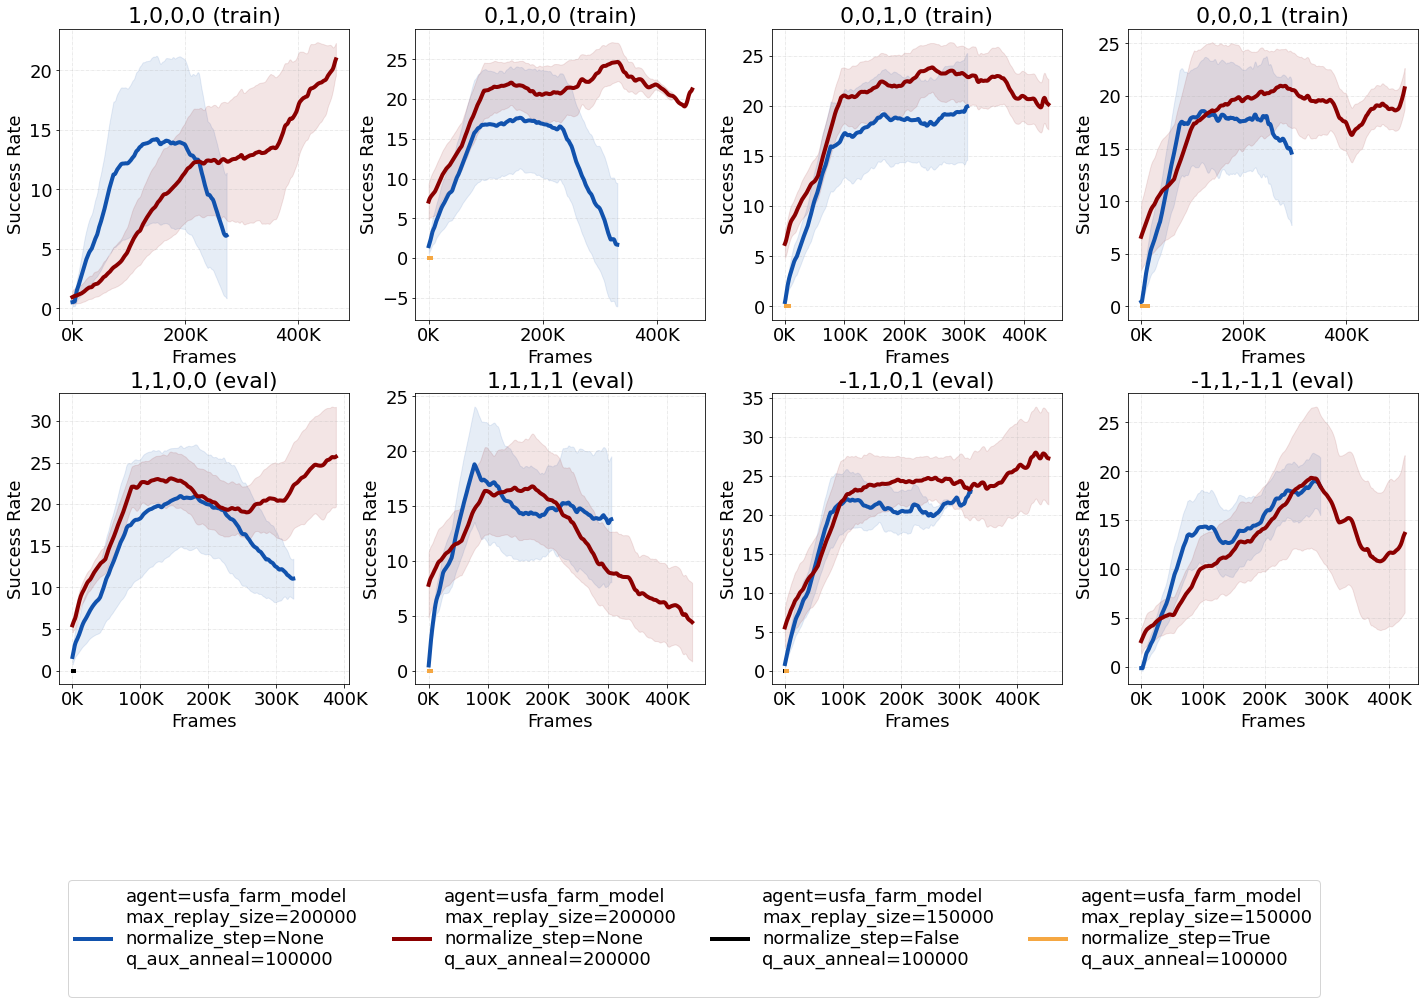

In [16]:
vis_tool.plot_filters(
    topk=1,
    # legend_kwargs="right",
    maxcols=4,
    data_filters=[
        # dict(
        #     settings=dict(agent='usfa_farmflat'),
        #     label='USFA + FARM',
        #     color='blue',
        #     # linestyle='--',
        # ),
        # dict(
        #     settings=dict(agent='usfa_farmflat_model'),
        #     label='USFA + FARM + Model',
        #     color='dark_blue',
        # ),
        # dict(
        #     settings=dict(agent='usfa_farm'),
        #     label='Modular USFA',
        #     color='red',
        #     # linestyle='--',
        # ),
        # dict(
        #     settings=dict(agent='usfa_farm_model'),
        #     label='Modular USFA + Model',
        #     color='dark_red',
        # ),
        # dict(
        #     settings=dict(agent='usfa'),
        #     label='USFA w/ oracle',
        #     color='black',
        # ),
        dict(
            settings=dict(
                agent='usfa_farm_model',
                **varied_dict,
            ),
            # label='UVFA w/o task',
            # color='orange',
            # linestyle='--',
        ),
        # dict(
        #     settings=dict(agent='r2d1_no_task'),
        #     label='UVFA w/o task',
        #     color='orange',
        #     linestyle='--',
        # ),
        
    ],
    display_settings=['agent'],
    legend_kwargs=dict(
                loc='lower left',
                bbox_to_anchor=(0,-1.1075), 
                ncol=5,
                ),
    fig_kwargs=dict(legend_text_size=18),
    plot_data_kwargs=dict(
                          xlabel_key='evaluator/ActorSteps',
                          xmax=1000e3,
                          n_samples=400,
                          rolling=100,
                          std_alpha=.1,
                          err_fn=lambda h: h.grouped.sem(),
                          err_style='fill'),
    subplot_kwargs=dict(unit=5),
)